### Importing Libraries

In [16]:
import pandas as pd
import numpy as np

#!pip install plotly
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

#import plotly.plotly as py
#import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#init_notebook_mode(connected=True)

import chart_studio.plotly as py
import plotly.graph_objs as go
from collections import defaultdict

# Sci-kit learn library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from wordcloud import WordCloud, STOPWORDS


from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

import nltk
#!pip install pydot

import keras
from keras.models import Sequential
from keras.layers import Dense

import pydot
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashut\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ashut\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
!pip3 install tensorflow

In [3]:
import requests
from bs4 import BeautifulSoup # to scrap data from the websites.

## Sarcastic news sample


In [4]:
scraped_list1 = []
url = 'https://www.theonion.com/'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
headlines = soup.find('body').find_all('h4')
for x in headlines:
    clean_sentences = x.text.strip()
    scraped_list1.append(clean_sentences)
scraped_list1

['Poll: Majority Of Democrats Prefer Someone Else Inhabit Joe Biden’s Body In 2024',
 'Conservatives Explain Why They Are Homeschooling Their Kids',
 'What To Know About The European Heat Wave',
 'Black Actress Forced To Bring Own Hair Products, Makeup, Lighting To Movie Set',
 'Woman Has Friend On Standby To Drive Car Through Bar Window In Case Date Going Badly',
 'Heroic Investigator Comments ‘What Happened?’ On Facebook Death Announcement',
 '‘Would Take Hell Of A Lot More Than This To Snap Cable,’ Reports Jumping Man In Elevator',
 'Newly Released Footage Of Uvalde Shooting Altered To Remove Police Laughter',
 'Americans Explain Why They Prefer Gas Over Electric Cars',
 'Symphony-Goer Heads To Seat Carrying Novelty Tuba Full Of Nachos',
 'Jennifer Lopez Weds Ben Affleck In Las Vegas Drive-Through Chapel',
 'Barber Hopes To Make First Chair Someday',
 'Britain Battles Heat Wave By Turning Up London Eye To Highest Setting',
 'What To Know About Monkeypox',
 'Report: Which One Of You 

In [ ]:
#S
Black Actress Forced To Bring Own Hair Products, Makeup, Lighting To Movie Set

In [ ]:
#NS
Highland Park Parade Shooting Suspect Pleads Not Guilty

In [20]:
df_scraped1 = pd.DataFrame(scraped_list1, columns=['headline'])
df_scraped1['is_sarcastic'] = '1'
df_scraped1

,headline,is_sarcastic
0,Texans Explain Why They Are Voting For Greg Ab...,1
1,Experts Say Ongoing Institutional Crisis In Ha...,1
2,Friend Who Doesn’t Drink Announces Plans To Bu...,1
3,BTK Ready To Start Dating Again,1
4,Britney Spears Placed Under Conservatorship Ag...,1
5,Whole Conversation Wasted Getting To Know New ...,1
6,Christian Parents Encourage Child To Save Self...,1
7,Employee Always Complaining About No Time Off ...,1
8,Old Dog Having Absolute Blast On Car Ride Over...,1
9,China Says It May Have Detected Signals From A...,1


## Non-Sarcastic news sample

In [21]:
scraped_list2 = []
url = 'https://www.huffpost.com/'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
headlines = soup.find('body').find_all('h3')
for x in headlines:
    clean_sentences = x.text.strip()
    scraped_list2.append(clean_sentences)
scraped_list2

['Raffensperger’s Wife Received ‘Sexualized’ Threats Amid Trump’s Campaign To Steal The Election',
 'GOP State Officials Testify About Trump’s Pressure Campaign To Steal 2020 Election',
 'Uvalde Cops Assumed Classroom Door Was Locked, Didn’t Even Try To Open It',
 'Senators Unveil Bipartisan Gun Bill With Hopes Of Passing It This Week',
 'More Than 200 Abortion Clinics Will Close If The Supreme Court Overturns Roe',
 'Rudy Giuliani Had ‘Lots Of Theories’ About Voter Fraud ‘But No Evidence’: Arizona Official',
 'Georgia Election Workers On Trump-Fueled Nightmare: ‘There Is Nowhere I Feel Safe’',
 'Sotomayor Voices ‘Growing Concern’ Over Conservative Supreme Court',
 '6 Major Takeaways From The Jan. 6 Committee’s Fourth Hearing',
 'Texas Rep. Henry Cuellar Survives Second Progressive Primary Challenge',
 'Supreme Court Rules Religious Schools Can Get Maine Tuition Aid',
 'Texas Public Safety Chief Calls Uvalde Response An ‘Abject Failure’',
 'South Dakota Attorney General Jason Ravnsborg

In [22]:
df_scraped2 = pd.DataFrame(scraped_list2, columns=['headline'])
df_scraped2['is_sarcastic'] = '0'
df_scraped2

,headline,is_sarcastic
0,Raffensperger’s Wife Received ‘Sexualized’ Thr...,0
1,GOP State Officials Testify About Trump’s Pres...,0
2,"Uvalde Cops Assumed Classroom Door Was Locked,...",0
3,Senators Unveil Bipartisan Gun Bill With Hopes...,0
4,More Than 200 Abortion Clinics Will Close If T...,0
...,...,...
63,26 Things People Who Work From Home Have Calle...,0
64,Alabama Teen Accepted To 15 Top Universities W...,0
65,School Flying Black Lives Matter And Pride Fla...,0
66,The 20 Funniest Tweets From Women This Week,0


In [23]:
df_scraped_agg = pd.concat([df_scraped1, df_scraped2], ignore_index=True)
df_scraped_agg

,headline,is_sarcastic
0,Texans Explain Why They Are Voting For Greg Ab...,1
1,Experts Say Ongoing Institutional Crisis In Ha...,1
2,Friend Who Doesn’t Drink Announces Plans To Bu...,1
3,BTK Ready To Start Dating Again,1
4,Britney Spears Placed Under Conservatorship Ag...,1
...,...,...
107,26 Things People Who Work From Home Have Calle...,0
108,Alabama Teen Accepted To 15 Top Universities W...,0
109,School Flying Black Lives Matter And Pride Fla...,0
110,The 20 Funniest Tweets From Women This Week,0


### Importing Sample Dataset

In [96]:
df_existing = pd.read_json('C:/Users/ashut/Desktop/GEORGIAN FILES/SEM2/01. Data Analytics Project-BDAT1011 (Richard Lambroff)/Sarcasm_Headlines_Dataset/Sarcasm_Headlines_Dataset.json', lines=True)
df_existing.head(10)

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
5,https://www.huffingtonpost.com/entry/advancing...,advancing the world's women,0
6,https://www.huffingtonpost.com/entry/how-meat-...,the fascinating case for eating lab-grown meat,0
7,https://www.huffingtonpost.com/entry/boxed-col...,"this ceo will send your kids to school, if you...",0
8,https://politics.theonion.com/top-snake-handle...,top snake handler leaves sinking huckabee camp...,1
9,https://www.huffingtonpost.com/entry/fridays-m...,friday's morning email: inside trump's presser...,0


In [97]:
df_existing.shape

(26709, 3)

In [98]:
df_existing.headline[1]   # non-sarcastic headline sample

"the 'roseanne' revival catches up to our thorny political mood, for better and worse"

In [99]:
df_existing.headline[2]  # sarcastic headline sample

"mom starting to fear son's web series closest thing she will have to grandchild"

In [100]:
df_existing = df_existing[['headline','is_sarcastic']]        #drop 'article_link' column.
df_existing.head(10)

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0
5,advancing the world's women,0
6,the fascinating case for eating lab-grown meat,0
7,"this ceo will send your kids to school, if you...",0
8,top snake handler leaves sinking huckabee camp...,1
9,friday's morning email: inside trump's presser...,0


In [101]:
df = pd.concat([df_scraped_agg, df_existing], ignore_index=True)
df

,headline,is_sarcastic
0,Texans Explain Why They Are Voting For Greg Ab...,1
1,Experts Say Ongoing Institutional Crisis In Ha...,1
2,Friend Who Doesn’t Drink Announces Plans To Bu...,1
3,BTK Ready To Start Dating Again,1
4,Britney Spears Placed Under Conservatorship Ag...,1
...,...,...
26816,american politics in moral free-fall,0
26817,america's best 20 hikes,0
26818,reparations and obama,0
26819,israeli ban targeting boycott supporters raise...,0


### Understanding the Data

In [102]:
#Below is a 'Pie chart' to show the proportion of Sarcastic and Non-Sarcastic articles.
sar_acc_tar = df['is_sarcastic'].value_counts()
labels = ['Non-Sarcastic', 'Sarcastic']
sizes = (np.array((sar_acc_tar / sar_acc_tar.sum())*100))
colors = ['#ebf017', '##2255de']  #Blue/Yellow colour codes

hoverpie = go.Pie(labels=labels, values=sizes, opacity = 0.9, hoverinfo='label+percent',
               marker=dict(colors=colors, line=dict(color='#140202', width=2)))

layout = go.Layout(title='Sarcastic Vs Non-Sarcastic')

data = [hoverpie]
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename="new_plot")

In [103]:
df['is_sarcastic'].value_counts()

0    14985
1    11724
0       68
1       44
Name: is_sarcastic, dtype: int64

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26821 entries, 0 to 26820
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   headline      26821 non-null  object
 1   is_sarcastic  26821 non-null  object
dtypes: object(2)
memory usage: 419.2+ KB


### Frequent Occuring word
##### Below plot shows the Top 50 MOST COMMONLY OCCURING WORDS in the dataset.

In [105]:
all_words = df['headline'].str.split(expand=True).unstack().value_counts()
hoverbar = [go.Bar(
            x = all_words.index.values[1:50],
            y = all_words.values[1:50],
            marker= dict(colorscale='Picnic',color = all_words.values[1:100]),text='Word counts')]

layout = go.Layout(title='Frequent Occuring word (unclean) in Headline')

fig = go.Figure(data=hoverbar, layout=layout)
iplot(fig, filename='style-bar')

###### From the above plot its clearly evident that the headlines need to be cleaned as the top 50 most occuring words are joing words and indirect words which does not provide any meaning in this analysis.

### Bag of words Analysis

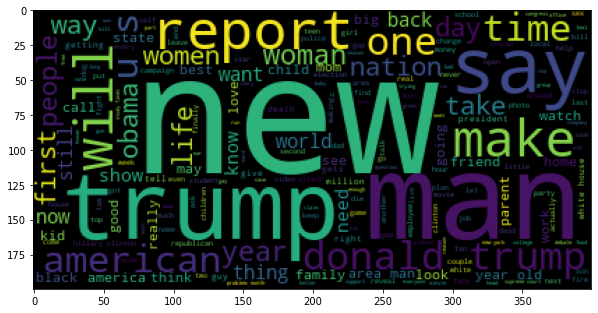

In [106]:
from wordcloud import WordCloud

input_string=' '.join(df['headline'])           
wc=WordCloud().generate(input_string)   
plt.figure(figsize=(10,10))
plt.imshow(wc)

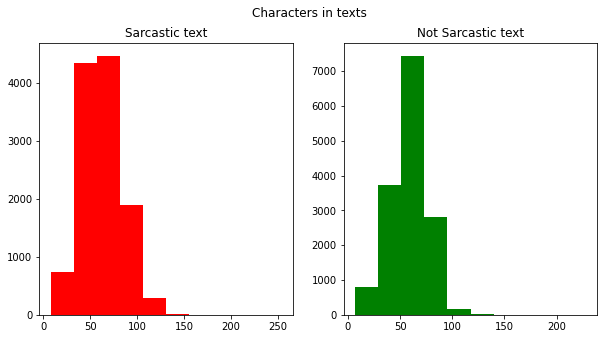

In [35]:
## Characters in texts
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df[df['is_sarcastic']==1]['headline'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('Sarcastic text')
text_len=df[df['is_sarcastic']==0]['headline'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('Not Sarcastic text')
fig.suptitle('Characters in texts')
plt.show()

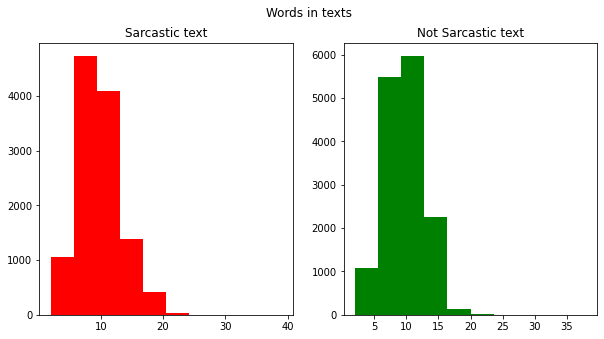

In [36]:
## Words in texts
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df[df['is_sarcastic']==1]['headline'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('Sarcastic text')
text_len=df[df['is_sarcastic']==0]['headline'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Not Sarcastic text')
fig.suptitle('Words in texts')
plt.show()

C:\Users\ashut\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\ashut\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 0.98, 'Average word length in each text')

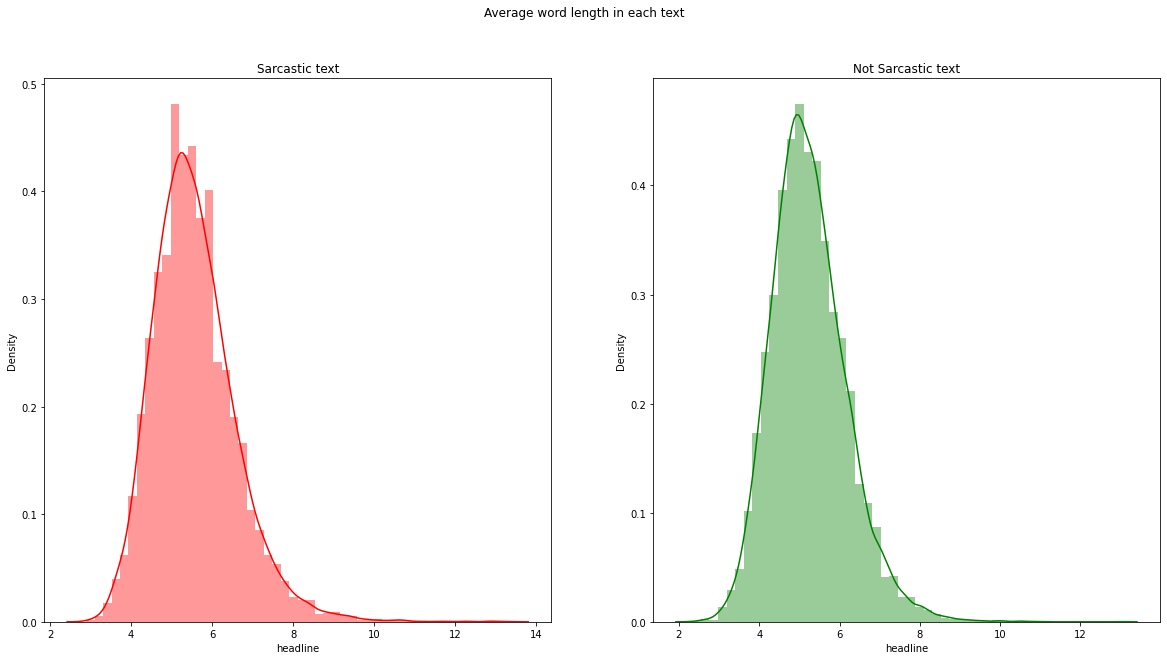

In [37]:
## Average word length in a text
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=df[df['is_sarcastic']==1]['headline'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Sarcastic text')
word=df[df['is_sarcastic']==0]['headline'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Not Sarcastic text')
fig.suptitle('Average word length in each text')

##### Most frequent words -> New, Man, Trump, Say, Will, Report, Make, Life, Donald, First, One, Woman, Back.

### Data Cleaning

In [107]:
docs = df['headline'].str.lower().str.replace('[^a-z ]', '') 
docs

C:\Users\ashut\AppData\Local\Temp/ipykernel_15308/1059610017.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



0        texans explain why they are voting for greg ab...
1        experts say ongoing institutional crisis in ha...
2        friend who doesnt drink announces plans to buy...
3                          btk ready to start dating again
4        britney spears placed under conservatorship ag...
                               ...                        
26816                  american politics in moral freefall
26817                                 americas best  hikes
26818                                reparations and obama
26819    israeli ban targeting boycott supporters raise...
26820                        gourmet gifts for the foodie 
Name: headline, Length: 26821, dtype: object

In [85]:
stopwords = nltk.corpus.stopwords.words('english') 
stemmer = nltk.stem.PorterStemmer()

def clean_sentence(text):
    words = text.split(' ')
    words_clean = [stemmer.stem(word) for word in words if word not in stopwords]
    return ' '.join(words_clean)
docs_clean = docs.apply(clean_sentence)
docs_clean

0                           texan explain vote greg abbott
1        expert say ongo institut crisi haiti could dec...
2        friend doesnt drink announc plan buy weirdest ...
3                                     btk readi start date
4        britney spear place conservatorship court dete...
                               ...                        
26816                         american polit moral freefal
26817                                   america best  hike
26818                                          repar obama
26819    isra ban target boycott support rais alarm abroad
26820                                  gourmet gift foodi 
Name: headline, Length: 26821, dtype: object

In [40]:
df['headline'] = df['headline'].str.lower().str.replace('[^a-z ]', '') 

C:\Users\ashut\AppData\Local\Temp/ipykernel_15308/2130889501.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [41]:
## visualization after cleaning
cleaned_sentences = []
def clean_sentence(text):
    words = text.split(' ')
    words_clean = [stemmer.stem(word) for word in words if word not in stopwords]
    return ' '.join(words_clean)

for document in df['headline']:
    cleaning_done = clean_sentence(document)
    cleaned_sentences.append(cleaning_done)
cleaned_sentences

['texan explain vote greg abbott',
 'expert say ongo institut crisi haiti could decis piec knowledg make seem smart',
 'friend doesnt drink announc plan buy weirdest fuck soda imagin',
 'btk readi start date',
 'britney spear place conservatorship court determin she much fun',
 'whole convers wast get know new neighbor airbnb guest',
 'christian parent encourag child save self church leader',
 'employe alway complain time suddenli upset get fire',
 'old dog absolut blast car ride euthanasia appoint',
 'china say may detect signal alien civil',
 'old dog absolut blast car ride euthanasia appoint',
 'fda warn american take mouth instant',
 'mustplay game playstat plu premium',
 'queasi eye',
 'biggest revel jan  hear',
 'encourag report find planet still habit ',
 'new black wristband design visitor condemn spend etern water park',
 'grandma didnt exactli live  countri love travel',
 'said gift scream mom cloud birthday present begin violent swirl around room',
 'sacrifici altar comfier 

In [42]:
df_clean = pd.DataFrame(cleaned_sentences, columns=['headline'])

In [43]:
all_words = df_clean['headline'].str.split(expand=True).unstack().value_counts()
hoverbar = [go.Bar(
            x = all_words.index.values[1:50],
            y = all_words.values[1:50],
            marker= dict(colorscale='Viridis',color = all_words.values[1:100]),text='Word counts')]

layout = go.Layout(title='Frequent Occuring word (cleaned) in Headline')

fig = go.Figure(data=hoverbar, layout=layout)
iplot(fig, filename='style-bar')

In [44]:

def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

freq_dict = defaultdict(int)

for sent,tag in zip(df['headline'], df['is_sarcastic']):
    if tag == '1':
        for word in generate_ngrams(sent,2):
            freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'Blue')

layout = go.Layout(title='BiGrams for sarcastic')

fig = go.Figure(data=trace0, layout=layout)
iplot(fig, filename='style-bar')

In [45]:

for sent,tag in zip(df['headline'], df['is_sarcastic']):
    if tag == '0':
        for word in generate_ngrams(sent,2):
            freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'Green')

layout = go.Layout(title='BiGrams for non-sarcastic')

fig = go.Figure(data=trace0, layout=layout)
iplot(fig, filename='style-bar')

In [46]:
##trigrams


for sent,tag in zip(df['headline'], df['is_sarcastic']):
    if tag == '1':
        for word in generate_ngrams(sent,3):
            freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'Red')

layout = go.Layout(title='TriGrams for sarcastic')

fig = go.Figure(data=trace0, layout=layout)
iplot(fig, filename='style-bar')




for sent,tag in zip(df['headline'], df['is_sarcastic']):
    if tag == '0':
        for word in generate_ngrams(sent,2):
            freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'Green')

layout = go.Layout(title='TriGrams for non-sarcastic')

fig = go.Figure(data=trace0, layout=layout)
iplot(fig, filename='style-bar')

#### Using Count Vectorizer

In [108]:
vectorizer = CountVectorizer()
vectorizer.fit(docs_clean)
dtm = vectorizer.transform(docs_clean)
dtm

<26821x19037 sparse matrix of type '<class 'numpy.int64'>'
	with 185903 stored elements in Compressed Sparse Row format>

#### Understanding Sparcity

In [109]:
no_of_zeros = (26709*18988)-185058 
sparsity = (no_of_zeros)/(26709*18988)*100
sparsity

99.96351023948135

In [110]:
df_dtm = pd.DataFrame(dtm.toarray(), columns = vectorizer.get_feature_names())          #Uncompres data
(df_dtm == 0).sum().sum()

510405474

In [111]:
(26709*18988)-506965434

185058

In [112]:
df_dtm.sum().sort_values(ascending=False).head(20)

trump       1653
new         1522
man         1388
get          776
say          702
report       670
make         625
us           569
day          538
one          536
year         524
nation       504
american     497
time         497
area         492
woman        481
donald       473
like         473
obama        426
take         418
dtype: int64

In [91]:
df_dtm

,aaa,aaron,aarp,aatish,ab,abandon,abaya,abba,abbey,abbi,...,zookeep,zooland,zoologist,zoom,zoroastrian,zs,zsa,zucker,zuckerberg,zz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26816,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26817,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26818,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26819,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Trying different Models

In [113]:
from sklearn.model_selection import train_test_split
train_x, test_x = train_test_split(df_dtm, test_size=0.2, random_state=100)

In [114]:
train_y = df.iloc[train_x.index]['is_sarcastic']
test_y  = df.iloc[test_x.index]['is_sarcastic']

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB

In [116]:
#Logistic Regression
modellinear = LogisticRegression(solver='liblinear', penalty='l1')
modellinear.fit(train_x, train_y)
predLR = modellinear.predict(test_x)
score_LogReg_1 = accuracy_score(test_y,predLR)
score_LogReg_2 = f1_score(test_y, predLR)
print('Accuracy of Logistic Regression: ', accuracy_score(test_y,predLR))
print('f1_score of Logistic Regression: ', f1_score(test_y, predLR))

ValueError: Unknown label type: 'unknown'

In [ ]:
#GaussianNB
model = GaussianNB()
model.fit(train_x, train_y)
NB_predict_class = model.predict(test_x)
score_NB_1 = f1_score(test_y, NB_predict_class)
score_NB_2 = accuracy_score(test_y, NB_predict_class)
print('Accuracy of Naive Bayes: ', accuracy_score(test_y, NB_predict_class))
print('f1_score of Naive Bayes: ', f1_score(test_y, NB_predict_class))

In [ ]:
#LinearSVC
model_svc = LinearSVC()
model_svc.fit(train_x, train_y)
predSVC = model_svc.predict(test_x)
score_svc_1 = f1_score(test_y, predSVC)
score_svc_2 = accuracy_score(test_y, predSVC)
print('Accuracy of LinearSVC: ', accuracy_score(test_y, predSVC))
print('f1_score of LinearSVC: ', f1_score(test_y, predSVC))

In [ ]:
#BernoulliNB
nb = BernoulliNB()
nb.fit(train_x, train_y)
predBer = nb.predict(test_x)
score_bernoulli_1 = f1_score(test_y, predBer)
score_bernoulli_2 = accuracy_score(test_y, predBer)
print('Accuracy of Bernoulli :', accuracy_score(test_y, predBer))
print('f1 score of Bernoulli :', f1_score(test_y, predBer))

In [ ]:
models1 = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes','LinearSVC','BernoulliNB'],
    'f1_Score': [score_LogReg_1, score_NB_1, score_svc_1, score_bernoulli_1],
    'acc_Score': [score_LogReg_2, score_NB_2, score_svc_2, score_bernoulli_2]})
models1.sort_values(by='acc_Score', ascending=False)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc

### Using TfIdf Vectorizer

In [ ]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,3), max_features=5000)
X = tf.fit_transform(df['headline']).toarray()
y = df['is_sarcastic'].values

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [ ]:
X_train.shape

In [ ]:
nb = BernoulliNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
score_bernoulli1 = f1_score(y_pred, y_test)
score_bernoulli2 = accuracy_score(y_pred, y_test)
print('Accuracy of Bernoulli :', accuracy_score(y_pred, y_test))
print('f1 score of Bernoulli :', f1_score(y_pred, y_test))

In [ ]:
modellogistic = LogisticRegression(solver='liblinear', penalty='l1')
modellogistic.fit(X_train, y_train)
pred_LR = modellogistic.predict(X_test)
score_LogReg1 = f1_score(pred_LR, y_test)
score_LogReg2 = accuracy_score(pred_LR, y_test)
print('Accuracy of Logistic Regression: ', accuracy_score(y_test, pred_LR))
print('f1_score of Logistic Regression: ', f1_score(y_test, pred_LR))

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)
NB_predictclass = model.predict(X_test)
score_NB1 = f1_score(NB_predictclass, y_test)
score_NB2 = accuracy_score(NB_predictclass, y_test)
print('Accuracy of Gaussian Naive Bayes: ', accuracy_score(y_test, NB_predictclass))
print('f1_score of Gaussian Naive Bayes: ', f1_score(y_test, NB_predictclass))

In [ ]:
model_svc = LinearSVC()
model_svc.fit(X_train, y_train)
pred_SVC = model_svc.predict(X_test)
score_svc1 = f1_score(pred_SVC, y_test)
score_svc2 = accuracy_score(pred_SVC, y_test)
print('Accuracy of LinearSVC: ', accuracy_score(y_test, pred_SVC))
print('f1_score of LinearSVC: ', f1_score(y_test, pred_SVC))

In [ ]:
models2 = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes','LinearSVC','BernoulliNB'],
    'f1_Score': [score_LogReg1, score_NB1, score_svc1, score_bernoulli1],
    'acc_Score': [score_LogReg2, score_NB2, score_svc2, score_bernoulli2]})
models2.sort_values(by='acc_Score', ascending=False)

### Neural Nets

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout

In [ ]:
print(X_train.shape)
print(X_test.shape)

In [ ]:
from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[1]
model1 = Sequential()

#Input Layer
model1.add(Dense(200, kernel_initializer = 'uniform', activation='relu',input_dim=input_dim))
model1.add(Dropout(rate=0.1))

#First
model1.add(layers.Dense(100,  kernel_initializer = 'uniform', activation='relu'))
model1.add(Dropout(rate=0.1))

#Second
model1.add(layers.Dense(50, kernel_initializer = 'uniform', activation='relu'))
model1.add(Dropout(rate=0.1))

#Third
model1.add(layers.Dense(30, kernel_initializer = 'uniform', activation='relu'))
model1.add(Dropout(rate=0.1))

#Output
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

In [ ]:
history = model1.fit(X_train, y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)

In [ ]:
loss, accuracy = model1.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model1.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

#### Plotting the Models Accuracy

In [52]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [53]:
plot_history(history)

KeyError: 'acc'

In [63]:
from sklearn.metrics import roc_auc_score
y_pred = model1.predict_proba(X_test)
roc_auc_score(y_test, y_pred)

AttributeError: 'Sequential' object has no attribute 'predict_proba'